In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [4]:
# Input file
fN = h5py.File("../6814_3/6814_3_featuresN.hdf5")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../6814_3/6814_3_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [5]:
# Get wells - data from timeseries_data, at position [2]

wells = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    if well in well_dict.keys():
        well_dict[well].append(i)

In [6]:
# get well by well, and store
d4 = [180, 710, 160, 690]
d3 = [180, 710, 880, 1410]
d2 = [180, 710, 1600, 2130]
d1 = [180, 710, 2320, 2850]

c4 = [895, 1425, 160, 690]
c3 = [895, 1425, 880, 1410]
c2 = [895, 1425, 1600, 2130]
c1 = [895, 1425, 2320, 2850]

b4 = [1620, 2150, 160, 690]
b3 = [1620, 2150, 880, 1410]
b2 = [1620, 2150, 1600, 2130]
b1 = [1620, 2150, 2320, 2850]

a4 = [2340, 2870, 160, 690]
a3 = [2340, 2870, 880, 1410]
a2 = [2340, 2870, 1600, 2130]
a1 = [2340, 2870, 2320, 2850]

In [7]:
well_names = list(well_dict.keys())
well_names

['A1',
 'A2',
 'A3',
 'A4',
 'B1',
 'B2',
 'B3',
 'B4',
 'C1',
 'C2',
 'C3',
 'C4',
 'D1',
 'D2',
 'D3',
 'D4']

In [ ]:
for well in well_names:
    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../6814_3/", sequential=False)

# Raw wells

In [5]:
well_names = list(well_dict.keys())
well_names

['A1',
 'A2',
 'A3',
 'A4',
 'B1',
 'B2',
 'B3',
 'B4',
 'C1',
 'C2',
 'C3',
 'C4',
 'D1',
 'D2',
 'D3',
 'D4']

In [8]:
wells = [a1, a2, a3, a4, b1, b2, b3, b4, c1, c2, c3, c4, d1, d2, d3, d4]

In [7]:
for i, well_name in enumerate(well_names):
    output = "../6814_3/raw_wells/%s_raw.npy" % well_name
    raw.get_raw_well(wells[i], well_name=well_name, video_path="../6814_3/6814_3.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- A1 --------
-------- A2 --------
-------- A3 --------
-------- A4 --------
-------- B1 --------
-------- B2 --------
-------- B3 --------
-------- B4 --------
-------- C1 --------
-------- C2 --------
-------- C3 --------
-------- C4 --------
-------- D1 --------
-------- D2 --------
-------- D3 --------
-------- D4 --------


In [8]:
for well_name in well_names:
    raw_video_path = '../6814_3/raw_wells/%s_raw.npy' % well_name
    txt = '../6814_3/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../6814_3')

(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 5

Processing raw video.
Processing raw video.


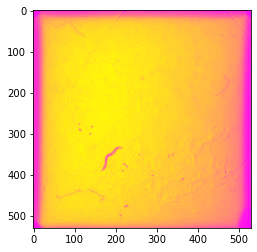

In [2]:
gif.plot_gif(np.load('../6814_3/C3_raw_1.npy'), '../6814_3/gif/C3_raw_1.gif', raw=True)
#gif.plot_gif(np.load('../6814_3/C3_mask_1.npy'), '../6814_3/gif/C3_mask_1.gif')

gif.plot_gif(np.load('../6814_3/B1_raw_1.npy'), '../6814_3/gif/B1_raw_1.gif', raw=True)
#gif.plot_gif(np.load('../6814_3/B1_mask_1.npy'), '../6814_3/gif/B1_mask_1.gif')

# Make lineages

In [9]:
# lineages

from lineage import make_lineage

a1_1 = make_lineage(traj, well_dict, 'A1', '6814_3', "../6814_3/A1_mask_1.npy", 1)
a2_1 = make_lineage(traj, well_dict, 'A2', '6814_3', "../6814_3/A2_mask_1.npy", 1)
a2_2 = make_lineage(traj, well_dict, 'A2', '6814_3', "../6814_3/A2_mask_2.npy", 2)
a2_3 = make_lineage(traj, well_dict, 'A2', '6814_3', "../6814_3/A2_mask_3.npy", 3)
a2_4 = make_lineage(traj, well_dict, 'A2', '6814_3', "../6814_3/A2_mask_4.npy", 4)

a3_1 = make_lineage(traj, well_dict, 'A3', '6814_3', "../6814_3/A3_mask_1.npy", 1)
a3_2 = make_lineage(traj, well_dict, 'A3', '6814_3', "../6814_3/A3_mask_2.npy", 2)
a3_3 = make_lineage(traj, well_dict, 'A3', '6814_3', "../6814_3/A3_mask_3.npy", 3)
a3_4 = make_lineage(traj, well_dict, 'A3', '6814_3', "../6814_3/A3_mask_4.npy", 4)

a4_1 = make_lineage(traj, well_dict, 'A4', '6814_3', "../6814_3/A4_mask_1.npy", 1)
a4_2 = make_lineage(traj, well_dict, 'A4', '6814_3', "../6814_3/A4_mask_2.npy", 2)

b1_1 = make_lineage(traj, well_dict, 'B1', '6814_3', "../6814_3/B1_mask_1.npy", 1)
b2_1 = make_lineage(traj, well_dict, 'B2', '6814_3', "../6814_3/B2_mask_1.npy", 1)

b3_1 = make_lineage(traj, well_dict, 'B3', '6814_3', "../6814_3/B3_mask_1.npy", 1)
b3_2 = make_lineage(traj, well_dict, 'B3', '6814_3', "../6814_3/B3_mask_2.npy", 2)

b4_1 = make_lineage(traj, well_dict, 'B4', '6814_3', "../6814_3/B4_mask_1.npy", 1)

c1_1 = make_lineage(traj, well_dict, 'C1', '6814_3', "../6814_3/C1_mask_1.npy", 1)
c1_2 = make_lineage(traj, well_dict, 'C1', '6814_3', "../6814_3/C1_mask_2.npy", 2)
c1_3 = make_lineage(traj, well_dict, 'C1', '6814_3', "../6814_3/C1_mask_3.npy", 3)
c1_4 = make_lineage(traj, well_dict, 'C1', '6814_3', "../6814_3/C1_mask_4.npy", 4)

c2_1 = make_lineage(traj, well_dict, 'C2', '6814_3', "../6814_3/C2_mask_1.npy", 1)
c2_2 = make_lineage(traj, well_dict, 'C2', '6814_3', "../6814_3/C2_mask_2.npy", 2)
c2_3 = make_lineage(traj, well_dict, 'C2', '6814_3', "../6814_3/C2_mask_3.npy", 3)

c3_1 = make_lineage(traj, well_dict, 'C3', '6814_3', "../6814_3/C3_mask_1.npy", 1)
c3_2 = make_lineage(traj, well_dict, 'C3', '6814_3', "../6814_3/C3_mask_2.npy", 2)
c3_3 = make_lineage(traj, well_dict, 'C3', '6814_3', "../6814_3/C3_mask_3.npy", 3)

c4_1 = make_lineage(traj, well_dict, 'C4', '6814_3', "../6814_3/C4_mask_1.npy", 1)
c4_2 = make_lineage(traj, well_dict, 'C4', '6814_3', "../6814_3/C4_mask_2.npy", 2)
c4_3 = make_lineage(traj, well_dict, 'C4', '6814_3', "../6814_3/C4_mask_3.npy", 3)
c4_4 = make_lineage(traj, well_dict, 'C4', '6814_3', "../6814_3/C4_mask_4.npy", 4)

d1_1 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_1.npy", 1)
d1_2 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_2.npy", 2)
d1_3 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_3.npy", 3)
d1_4 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_4.npy", 4)
d1_5 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_5.npy", 5)
d1_6 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_6.npy", 6)
d1_7 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_7.npy", 7)
d1_8 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_8.npy", 8)
d1_9 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_9.npy", 9)
d1_10 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_10.npy", 10)
d1_11 = make_lineage(traj, well_dict, 'D1', '6814_3', "../6814_3/D1_mask_11.npy", 11)

d2_1 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_1.npy", 1)
d2_2 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_2.npy", 2)
d2_3 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_3.npy", 3)
d2_4 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_4.npy", 4)
d2_5 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_5.npy", 5)
d2_6 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_6.npy", 6)
d2_7 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_7.npy", 7)
d2_8 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_8.npy", 8)
d2_9 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_9.npy", 9)
d2_10 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_10.npy", 10)
d2_11 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_11.npy", 11)
d2_12 = make_lineage(traj, well_dict, 'D2', '6814_3', "../6814_3/D2_mask_12.npy", 12)

d3_1 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_1.npy", 1)
d3_2 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_2.npy", 2)
d3_3 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_3.npy", 3)
d3_4 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_4.npy", 4)
d3_5 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_5.npy", 5)
d3_6 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_6.npy", 6)
d3_7 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_7.npy", 7)
d3_8 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_8.npy", 8)
d3_9 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_9.npy", 9)
d3_10 = make_lineage(traj, well_dict, 'D3', '6814_3', "../6814_3/D3_mask_10.npy", 10)

d4_1 = make_lineage(traj, well_dict, 'D4', '6814_3', "../6814_3/D4_mask_1.npy", 1)
d4_2 = make_lineage(traj, well_dict, 'D4', '6814_3', "../6814_3/D4_mask_2.npy", 2)

In [10]:
masks_fn = [
    "../6814_3/A1_mask_1.npy",
    "../6814_3/A2_mask_1.npy",
    "../6814_3/A2_mask_2.npy",
    "../6814_3/A2_mask_3.npy",
    "../6814_3/A2_mask_4.npy",

    "../6814_3/A3_mask_1.npy",
    "../6814_3/A3_mask_2.npy",
    "../6814_3/A3_mask_3.npy",
    "../6814_3/A3_mask_4.npy",

    "../6814_3/A4_mask_1.npy",
    "../6814_3/A4_mask_2.npy",

    "../6814_3/B1_mask_1.npy",
    "../6814_3/B2_mask_1.npy",

    "../6814_3/B3_mask_1.npy",
    "../6814_3/B3_mask_2.npy",

    "../6814_3/B4_mask_1.npy",

    "../6814_3/C1_mask_1.npy",
    "../6814_3/C1_mask_2.npy",
    "../6814_3/C1_mask_3.npy",
    "../6814_3/C1_mask_4.npy",

    "../6814_3/C2_mask_1.npy",
    "../6814_3/C2_mask_2.npy",
    "../6814_3/C2_mask_3.npy",

    "../6814_3/C3_mask_1.npy",
    "../6814_3/C3_mask_2.npy",
    "../6814_3/C3_mask_3.npy",

    "../6814_3/C4_mask_1.npy",
    "../6814_3/C4_mask_2.npy",
    "../6814_3/C4_mask_3.npy",
    "../6814_3/C4_mask_4.npy",

    "../6814_3/D1_mask_1.npy",
    "../6814_3/D1_mask_2.npy",
    "../6814_3/D1_mask_3.npy",
    "../6814_3/D1_mask_4.npy",
    "../6814_3/D1_mask_5.npy",
    "../6814_3/D1_mask_6.npy",
    "../6814_3/D1_mask_7.npy",
    "../6814_3/D1_mask_8.npy",
    "../6814_3/D1_mask_9.npy",
    "../6814_3/D1_mask_10.npy",
    "../6814_3/D1_mask_11.npy",

    "../6814_3/D2_mask_1.npy",
    "../6814_3/D2_mask_2.npy",
    "../6814_3/D2_mask_3.npy",
    "../6814_3/D2_mask_4.npy",
    "../6814_3/D2_mask_5.npy",
    "../6814_3/D2_mask_6.npy",
    "../6814_3/D2_mask_7.npy",
    "../6814_3/D2_mask_8.npy",
    "../6814_3/D2_mask_9.npy",
    "../6814_3/D2_mask_10.npy",
    "../6814_3/D2_mask_11.npy",
    "../6814_3/D2_mask_12.npy",

    "../6814_3/D3_mask_1.npy",
    "../6814_3/D3_mask_2.npy",
    "../6814_3/D3_mask_3.npy",
    "../6814_3/D3_mask_4.npy",
    "../6814_3/D3_mask_5.npy",
    "../6814_3/D3_mask_6.npy",
    "../6814_3/D3_mask_7.npy",
    "../6814_3/D3_mask_8.npy",
    "../6814_3/D3_mask_9.npy",
    "../6814_3/D3_mask_10.npy",

    "../6814_3/D4_mask_1.npy",
    "../6814_3/D4_mask_2.npy"
]

In [11]:
raw_fn = [
    "../6814_3/A1_raw_1.npy",
    "../6814_3/A2_raw_1.npy",
    "../6814_3/A2_raw_2.npy",
    "../6814_3/A2_raw_3.npy",
    "../6814_3/A2_raw_4.npy",

    "../6814_3/A3_raw_1.npy",
    "../6814_3/A3_raw_2.npy",
    "../6814_3/A3_raw_3.npy",
    "../6814_3/A3_raw_4.npy",

    "../6814_3/A4_raw_1.npy",
    "../6814_3/A4_raw_2.npy",

    "../6814_3/B1_raw_1.npy",
    "../6814_3/B2_raw_1.npy",

    "../6814_3/B3_raw_1.npy",
    "../6814_3/B3_raw_2.npy",

    "../6814_3/B4_raw_1.npy",

    "../6814_3/C1_raw_1.npy",
    "../6814_3/C1_raw_2.npy",
    "../6814_3/C1_raw_3.npy",
    "../6814_3/C1_raw_4.npy",

    "../6814_3/C2_raw_1.npy",
    "../6814_3/C2_raw_2.npy",
    "../6814_3/C2_raw_3.npy",

    "../6814_3/C3_raw_1.npy",
    "../6814_3/C3_raw_2.npy",
    "../6814_3/C3_raw_3.npy",

    "../6814_3/C4_raw_1.npy",
    "../6814_3/C4_raw_2.npy",
    "../6814_3/C4_raw_3.npy",
    "../6814_3/C4_raw_4.npy",

    "../6814_3/D1_raw_1.npy",
    "../6814_3/D1_raw_2.npy",
    "../6814_3/D1_raw_3.npy",
    "../6814_3/D1_raw_4.npy",
    "../6814_3/D1_raw_5.npy",
    "../6814_3/D1_raw_6.npy",
    "../6814_3/D1_raw_7.npy",
    "../6814_3/D1_raw_8.npy",
    "../6814_3/D1_raw_9.npy",
    "../6814_3/D1_raw_10.npy",
    "../6814_3/D1_raw_11.npy",

    "../6814_3/D2_raw_1.npy",
    "../6814_3/D2_raw_2.npy",
    "../6814_3/D2_raw_3.npy",
    "../6814_3/D2_raw_4.npy",
    "../6814_3/D2_raw_5.npy",
    "../6814_3/D2_raw_6.npy",
    "../6814_3/D2_raw_7.npy",
    "../6814_3/D2_raw_8.npy",
    "../6814_3/D2_raw_9.npy",
    "../6814_3/D2_raw_10.npy",
    "../6814_3/D2_raw_11.npy",
    "../6814_3/D2_raw_12.npy",

    "../6814_3/D3_raw_1.npy",
    "../6814_3/D3_raw_2.npy",
    "../6814_3/D3_raw_3.npy",
    "../6814_3/D3_raw_4.npy",
    "../6814_3/D3_raw_5.npy",
    "../6814_3/D3_raw_6.npy",
    "../6814_3/D3_raw_7.npy",
    "../6814_3/D3_raw_8.npy",
    "../6814_3/D3_raw_9.npy",
    "../6814_3/D3_raw_10.npy",

    "../6814_3/D4_raw_1.npy",
    "../6814_3/D4_raw_2.npy"
]

In [14]:
lineages = [
    a1_1,
    a2_1,
    a2_2,
    a2_3,
    a2_4,

    a3_1,
    a3_2,
    a3_3,
    a3_4,

    a4_1,
    a4_2,

    b1_1,
    b2_1,

    b3_1,
    b3_2,

    b4_1,

    c1_1,
    c1_2,
    c1_3,
    c1_4,

    c2_1,
    c2_2,
    c2_3,

    c3_1,
    c3_2,
    c3_3,

    c4_1,
    c4_2,
    c4_3,
    c4_4,

    d1_1,
    d1_2,
    d1_3,
    d1_4,
    d1_5,
    d1_6,
    d1_7,
    d1_8,
    d1_9,
    d1_10,
    d1_11,

    d2_1,
    d2_2,
    d2_3,
    d2_4,
    d2_5,
    d2_6,
    d2_7,
    d2_8,
    d2_9,
    d2_10,
    d2_11,
    d2_12,

    d3_1,
    d3_2,
    d3_3,
    d3_4,
    d3_5,
    d3_6,
    d3_7,
    d3_8,
    d3_9,
    d3_10,

    d4_1,
    d4_2
]

In [15]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

X = []

for i in y_indices:
    raw_array = np.load(raw_fn[i])
    X.append(raw_array)
    
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

print(len(y))
print(len(X))
print(len(lineages_true))

25
25
25


In [16]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../6814_3/6814_3.trks", lineages_true, X, y)

/opt/conda/lib/python3.7/site-packages/tensorflow-2.5.0-py3.7-linux-x86_64.egg/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
